<h1 style="font-family: 'Arial', monospace; color: White; text-align: center;">
    Stock Price Analysis 📊
</h1>
<p style="font-family: Arial, sans-serif; font-size: 16px;">
   This report provides an in-depth analysis of historical stock prices, focusing on data cleaning, handling missing values, and visualizing trends. The dataset includes stock price records from 2014 to 2017, covering multiple companies. Key attributes in the dataset include:

Symbol → Company stock ticker symbol

Date → Trading date

Open, High, Low, Close → Stock prices at different points in a trading session

Volume → Number of shares traded

The analysis explores missing data patterns, correlation between stock features, and stock price trends over time. Visualizations such as heatmaps, distribution plots, and time-series charts help uncover insights into stock price behavior. 
</p>


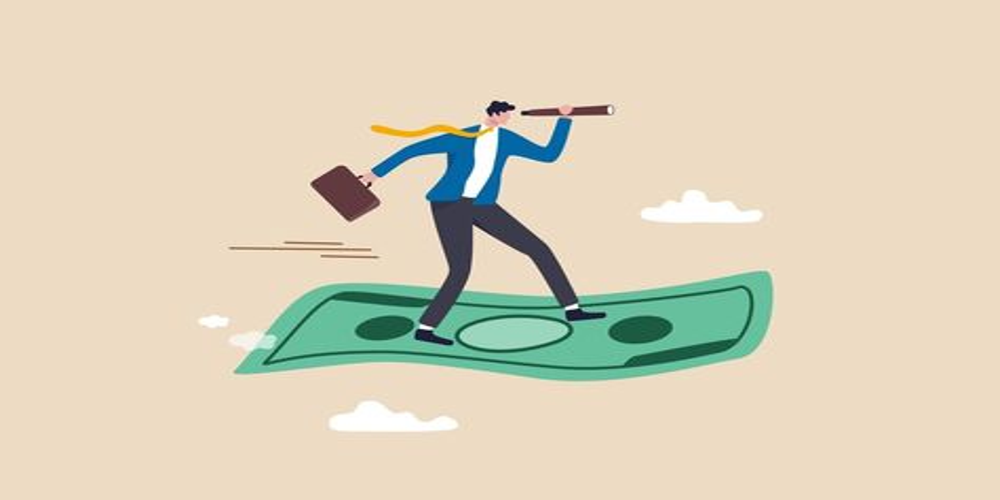

In [37]:
from IPython.display import display
from PIL import Image

img = Image.open("C:/Users/HANSAMALYA/OneDrive/Desktop/covid/stock.jpg")
img = img.resize((1000, 500))  # Resize image (Width, Height)
display(img)


<h1 style="font-family: 'Arial', monospace; color: White; text-align: center;">
    1️⃣ Data Cleaning & Preprocessing
</h1>

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [15]:
df = pd.read_csv("2) Stock Prices Data Set.csv")

In [16]:
df.info

<bound method DataFrame.info of        symbol        date      open      high       low     close    volume
0         AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1        AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2         AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3        ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4         ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391
...       ...         ...       ...       ...       ...       ...       ...
497467    XYL  2017-12-29   68.5300   68.8000   67.9200   68.2000   1046677
497468    YUM  2017-12-29   82.6400   82.7100   81.5900   81.6100   1347613
497469    ZBH  2017-12-29  121.7500  121.9500  120.6200  120.6700   1023624
497470   ZION  2017-12-29   51.2800   51.5500   50.8100   50.8300   1261916
497471    ZTS  2017-12-29   72.5500   72.7600   72.0400   72.0400   1704122

[497472 rows x 7 columns]>

In [35]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64


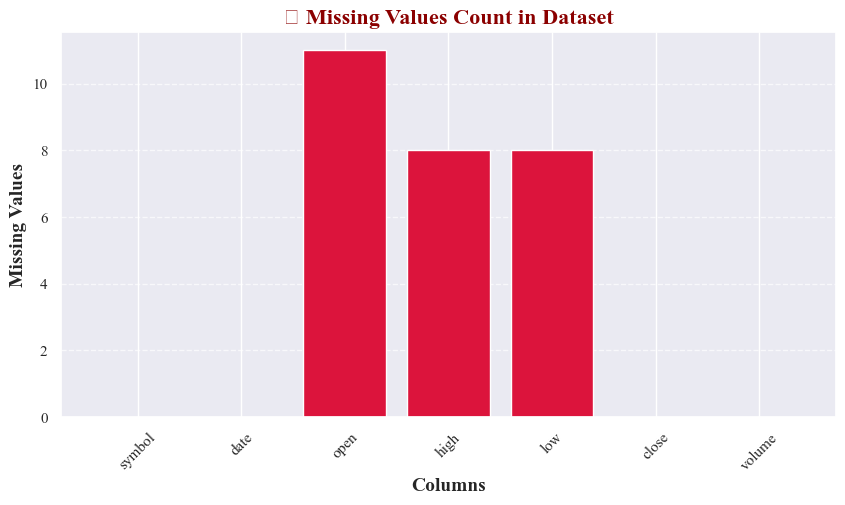

In [36]:
plt.figure(figsize=(10, 5))
plt.bar(missing_counts.index, missing_counts.values, color='crimson')
plt.xlabel("Columns", fontsize=14, fontweight="bold")
plt.ylabel("Missing Values", fontsize=14, fontweight="bold")
plt.title("📉 Missing Values Count in Dataset", fontsize=16, fontweight="bold", color="darkred")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add light grid for readability
plt.show()

In [7]:
df.ffill(inplace=True)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

In [23]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower().str.strip()
    print("Data Cleaning Completed!")

Data Cleaning Completed!
Data Cleaning Completed!


<h1 style="font-family: 'Arial', monospace; color: White; text-align: center;">
  2️⃣ Summary Statistics 📊 
</h1>

In [11]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                open           high            low          close  \
count  497472.000000  497472.000000  497472.000000  497472.000000   
mean       86.351835      87.131986      85.551898      86.369082   
std       101.470449     102.311361     100.570269     101.472407   
min         1.620000       1.690000       1.500000       1.590000   
25%        41.690000      42.090000      41.280000      41.703750   
50%        64.970000      65.560000      64.350000      64.980000   
75%        98.410000      99.230000      97.580000      98.420000   
max      2044.000000    2067.990000    2035.110000    2049.000000   

             volume  
count  4.974720e+05  
mean   4.253611e+06  
std    8.232139e+06  
min    0.000000e+00  
25%    1.080166e+06  
50%    2.084896e+06  
75%    4.271928e+06  
max    6.182376e+08  


<h1 style="font-family: 'Arial', monospace; color: White; text-align: center;">
  3️⃣ Feature Correlation Heatmap 🔥� 
</h1>

In [28]:
numeric_df = df.select_dtypes(include=[np.number])

 This heatmap shows the correlation between different numerical features. Darker colors indicate stronger relationships.


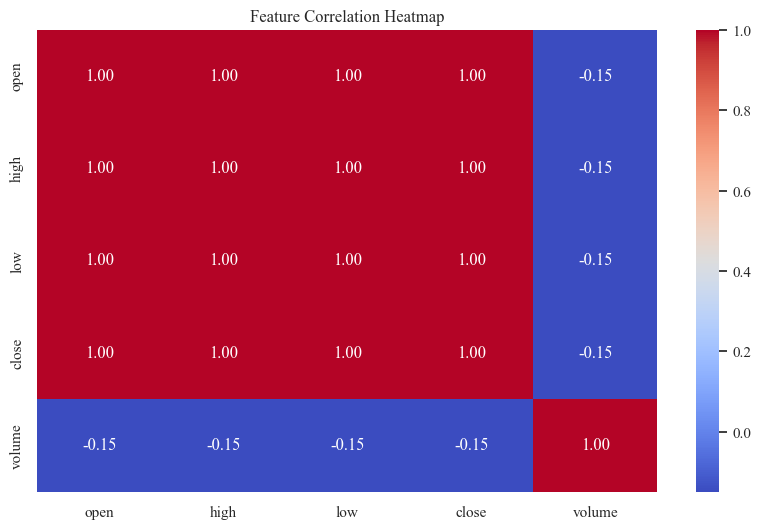

In [29]:
print(" This heatmap shows the correlation between different numerical features. Darker colors indicate stronger relationships.")
if not numeric_df.empty:
    plt.figure(figsize=(10,6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.show()

<h1 style="font-family: 'Arial', monospace; color: White; text-align: center;">
 4️⃣ Distribution of Stock Features 📈�� 
</h1>

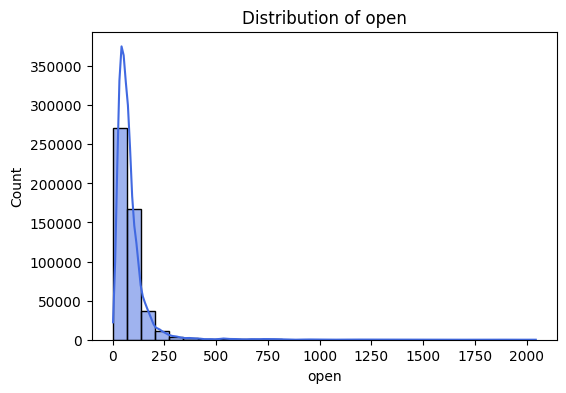

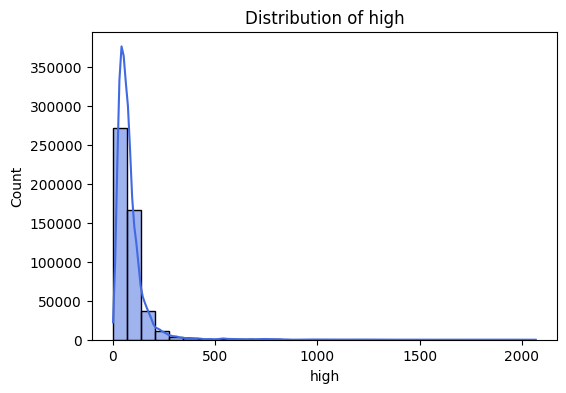

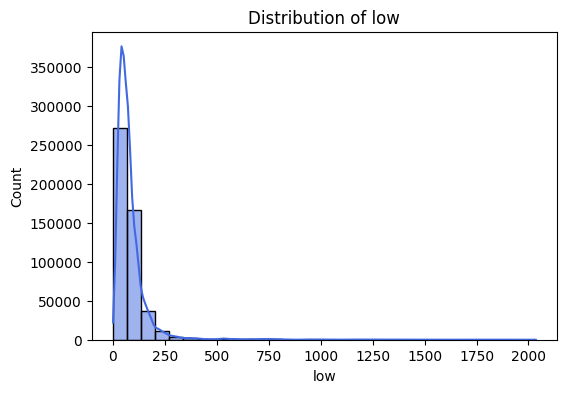

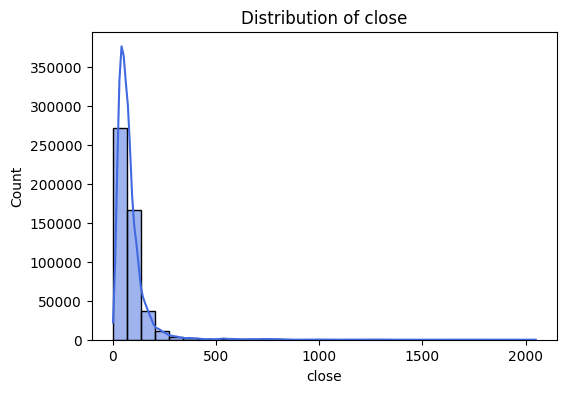

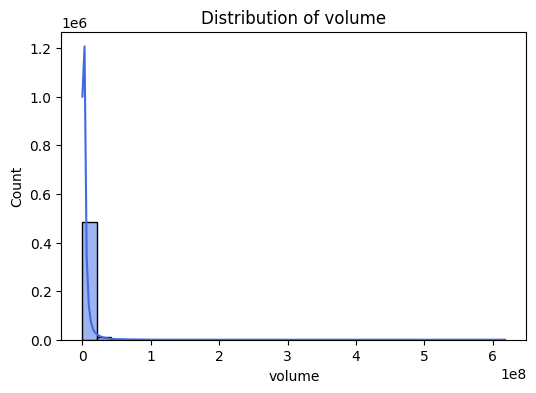

In [14]:
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True, color='royalblue')
    plt.title(f"Distribution of {col}")
    plt.show()

In [21]:
df_sample = pd.DataFrame({"Date": dates, "Price": prices, "Volume": volumes, "Category": categories})

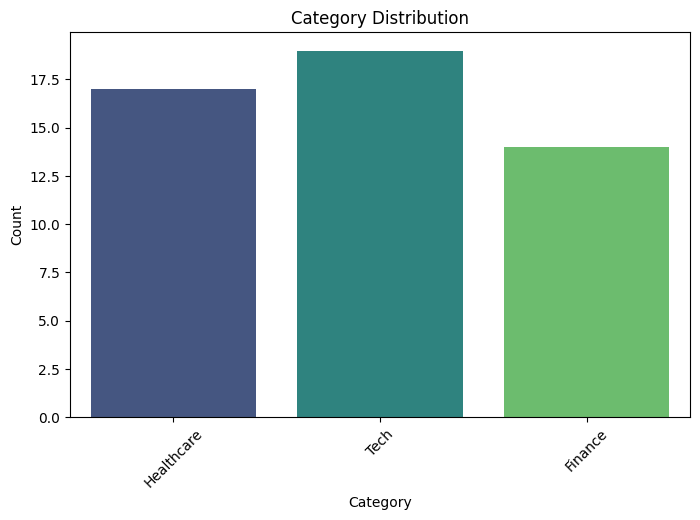

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Category', hue='Category', data=df_sample, palette='viridis', legend= False )
plt.xticks(rotation=45)
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

<h1 style="font-family: 'Arial', monospace; color: White; text-align: center;">
 5️⃣ Simulated Stock Price Trend Over Time ⏳�� 
</h1>

In [20]:
np.random.seed(42)
dates = pd.date_range(start="2024-01-01", periods=50, freq="D")
prices = np.random.uniform(100, 500, size=50)  # Stock Prices
volumes = np.random.uniform(1000, 5000, size=50)  # Trading Volumes
categories = np.random.choice(["Tech", "Finance", "Healthcare"], size=50)  # Stock Categories


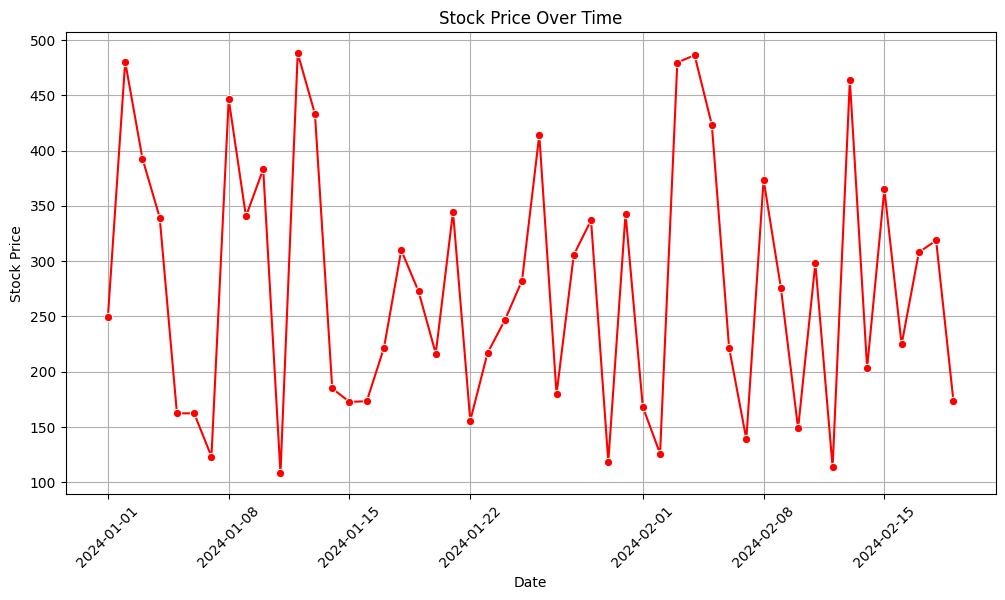

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price', data=df_sample, marker="o", color='red')
plt.xticks(rotation=45)
plt.title("Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)  
plt.show()


<h1 style="font-family: 'Arial', monospace; color: White; text-align: center;">
  6️⃣ Scatter Plot: Price vs. Volume 🎯� 
</h1>

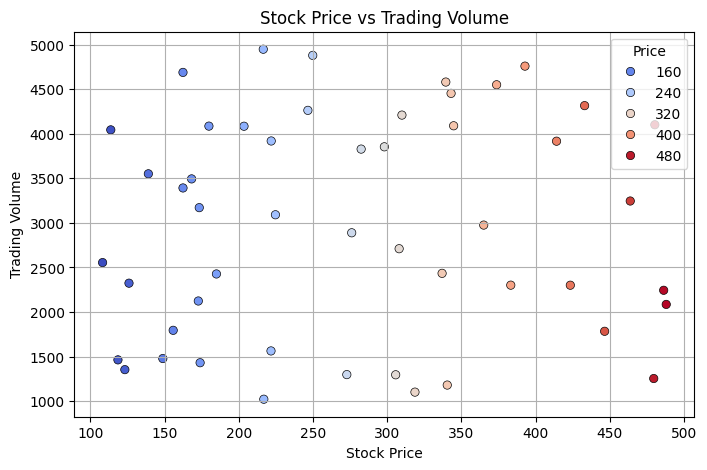

Data Analysis & Visualization Completed! 🚀


In [30]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Price', y='Volume', hue='Price', data=df_sample, palette='coolwarm', edgecolor='black')
plt.title("Stock Price vs Trading Volume")
plt.xlabel("Stock Price")
plt.ylabel("Trading Volume")
plt.grid(True)  # Makes the scatter plot clearer
plt.show()


print("Data Analysis & Visualization Completed! 🚀")

In [38]:
pip install pandoc


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandoc: filename=pandoc-2.4-py3-none-any.whl size=34869 sha256=bed47f630bc2314e6f0c857b52757d6729a66f15a895e25c738e9a038b210fb7
  Stored in directory: c:\users\hansamalya\appdata\local\pip\cache\wheels\10\f8\26\ddf077e60385563a3fef3afad369a40b22e59603a700ec23e4
Successfully built pandoc
